## Step 1: Reading and Understanding the Data


In [1460]:
#Import the necessary libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

In [1461]:
# Load the data
bike = pd.read_csv("day.csv")
bike.head()


instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [1462]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1463]:
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

## Step 2: Visualising the Data

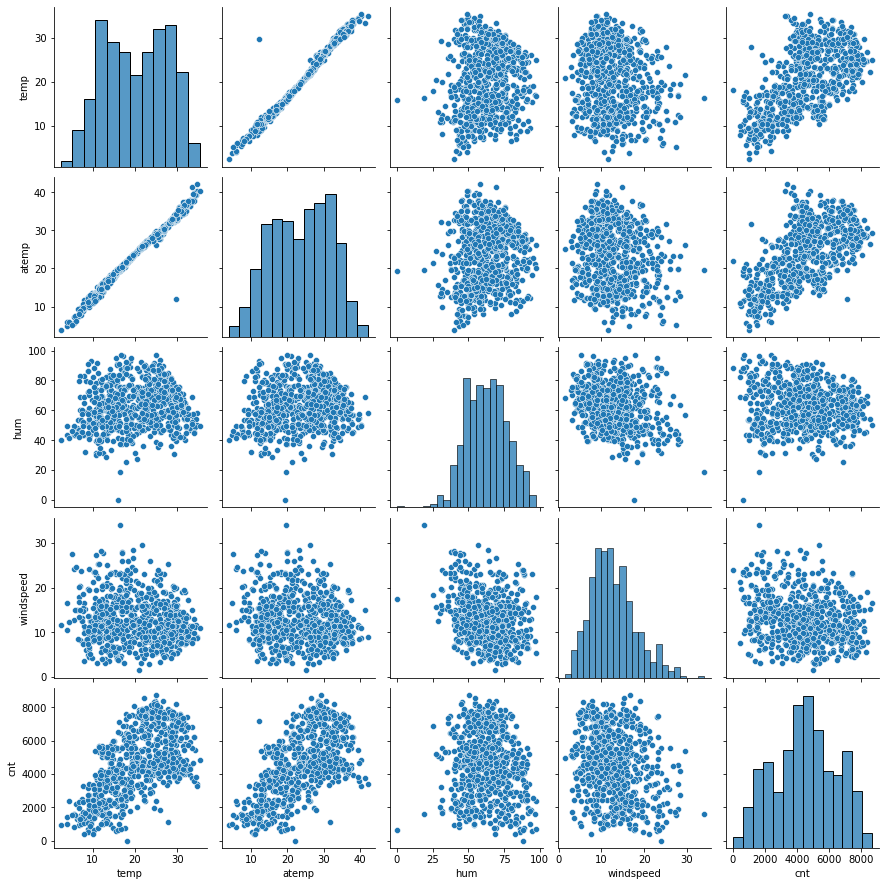

In [1274]:
# Visualise the Data
# Pairplot for continuous variables
bike_columns = ['temp','atemp','hum','windspeed','cnt']
bike_data = bike[bike_columns]
sns.pairplot(bike_data)
plt.show()

In [1464]:
# Boxplot for categorical variables
cat_var = ['season','holiday','weekday','yr','mnth','workingday','weathersit']

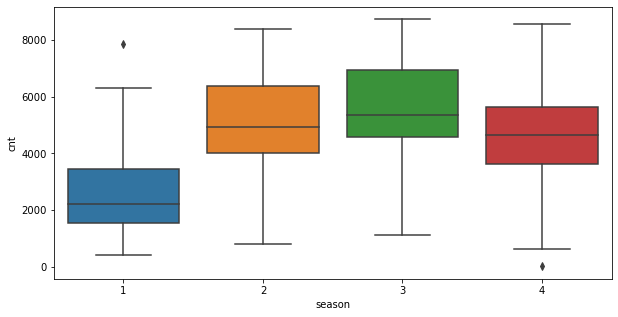

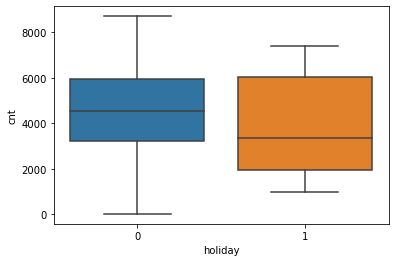

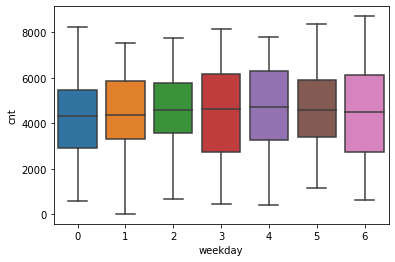

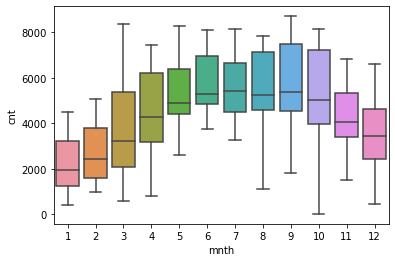

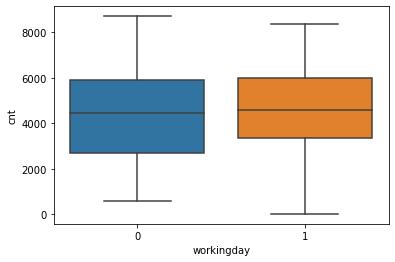

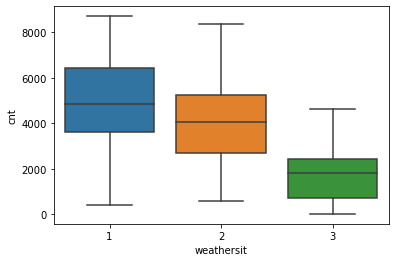

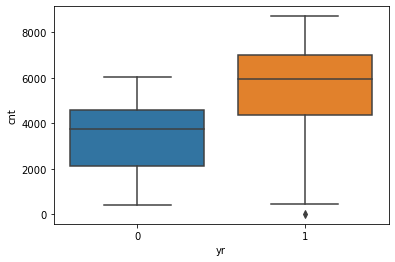

In [1471]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.show()
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.show()
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.show()
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.show()
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

## Step 3: Data Preparation

In [1284]:
# We don't require the columns 'instant' & 'dteday' as date has already been segregated into year , month and day.
# Drop the above mentioned columns.
bike.drop(['instant','dteday','registered','casual'], axis = 1, inplace = True)
bike.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [1285]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'seasonDummy'
seasonDummy = pd.get_dummies(bike['season'], drop_first = True)

# Add the results to the original bike dataframe
bike = pd.concat([bike, seasonDummy], axis = 1)
seasonDummy.head()

2  3  4
0  0  0  0
1  0  0  0
2  0  0  0
3  0  0  0
4  0  0  0

In [1286]:
#Rename column 2, 3 & 4 as summer, fall and winter.

#season : season (1:spring, 2:summer, 3:fall, 4:winter)
bike.rename(columns={2: 'summer',3: 'fall',4: 'winter'}, inplace=True)
bike.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  summer  fall  winter  
0  18.18125  80.5833  10.749882   985       0     0       0  
1  17.68695  69.6087  16.652113   801       0     0       0  
2   9.47025  43.7273  16.636703  1349       0     0       0  
3  10.60610  59.0435  10.739832  1562       0     0       0  
4  11.46350  43.6957  12.522300  1600       0     0       0

In [1287]:
# Drop 'season' as we have created the dummies for it
bike.drop(['season'], axis = 1, inplace = True)
bike.head()

yr  mnth  holiday  weekday  workingday  weathersit       temp     atemp  \
0   0     1        0        6           0           2  14.110847  18.18125   
1   0     1        0        0           0           2  14.902598  17.68695   
2   0     1        0        1           1           1   8.050924   9.47025   
3   0     1        0        2           1           1   8.200000  10.60610   
4   0     1        0        3           1           1   9.305237  11.46350   

       hum  windspeed   cnt  summer  fall  winter  
0  80.5833  10.749882   985       0     0       0  
1  69.6087  16.652113   801       0     0       0  
2  43.7273  16.636703  1349       0     0       0  
3  59.0435  10.739832  1562       0     0       0  
4  43.6957  12.522300  1600       0     0       0

In [1288]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'seasonDummy'
weather = pd.get_dummies(bike['weathersit'], drop_first = True)

# Add the results to the original bike dataframe
bike = pd.concat([bike, weather], axis = 1)
weather.head()

2  3
0  1  0
1  1  0
2  0  0
3  0  0
4  0  0

In [1289]:
# Drop 'weathersit' as we have created the dummies for it
bike.drop(['weathersit'], axis = 1, inplace = True)
bike.head()

yr  mnth  holiday  weekday  workingday       temp     atemp      hum  \
0   0     1        0        6           0  14.110847  18.18125  80.5833   
1   0     1        0        0           0  14.902598  17.68695  69.6087   
2   0     1        0        1           1   8.050924   9.47025  43.7273   
3   0     1        0        2           1   8.200000  10.60610  59.0435   
4   0     1        0        3           1   9.305237  11.46350  43.6957   

   windspeed   cnt  summer  fall  winter  2  3  
0  10.749882   985       0     0       0  1  0  
1  16.652113   801       0     0       0  1  0  
2  16.636703  1349       0     0       0  0  0  
3  10.739832  1562       0     0       0  0  0  
4  12.522300  1600       0     0       0  0  0

In [1290]:
#Rename column 2 & 3 as summer, fall and winter.

#weathersit : 
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

bike.rename(columns={2: 'cloudy',3: 'rain'}, inplace=True)
bike.head()

yr  mnth  holiday  weekday  workingday       temp     atemp      hum  \
0   0     1        0        6           0  14.110847  18.18125  80.5833   
1   0     1        0        0           0  14.902598  17.68695  69.6087   
2   0     1        0        1           1   8.050924   9.47025  43.7273   
3   0     1        0        2           1   8.200000  10.60610  59.0435   
4   0     1        0        3           1   9.305237  11.46350  43.6957   

   windspeed   cnt  summer  fall  winter  cloudy  rain  
0  10.749882   985       0     0       0       1     0  
1  16.652113   801       0     0       0       1     0  
2  16.636703  1349       0     0       0       0     0  
3  10.739832  1562       0     0       0       0     0  
4  12.522300  1600       0     0       0       0     0

In [1291]:
#Get the dummy variable for 'mnth' column
month=pd.get_dummies(bike['mnth'], drop_first=True)

#Rename the columns from feb to Dec, since Jan=1 has been dropped.
month.rename(columns={2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}, inplace=True)
month.head()

feb  mar  apr  may  jun  jul  aug  sep  oct  nov  dec
0    0    0    0    0    0    0    0    0    0    0    0
1    0    0    0    0    0    0    0    0    0    0    0
2    0    0    0    0    0    0    0    0    0    0    0
3    0    0    0    0    0    0    0    0    0    0    0
4    0    0    0    0    0    0    0    0    0    0    0

In [1292]:
#Add the 'month' variable with bike data
bike= pd.concat([bike,month], axis=1)
bike.head()

yr  mnth  holiday  weekday  workingday       temp     atemp      hum  \
0   0     1        0        6           0  14.110847  18.18125  80.5833   
1   0     1        0        0           0  14.902598  17.68695  69.6087   
2   0     1        0        1           1   8.050924   9.47025  43.7273   
3   0     1        0        2           1   8.200000  10.60610  59.0435   
4   0     1        0        3           1   9.305237  11.46350  43.6957   

   windspeed   cnt  ...  mar  apr  may  jun  jul  aug  sep  oct  nov  dec  
0  10.749882   985  ...    0    0    0    0    0    0    0    0    0    0  
1  16.652113   801  ...    0    0    0    0    0    0    0    0    0    0  
2  16.636703  1349  ...    0    0    0    0    0    0    0    0    0    0  
3  10.739832  1562  ...    0    0    0    0    0    0    0    0    0    0  
4  12.522300  1600  ...    0    0    0    0    0    0    0    0    0    0  

[5 rows x 26 columns]

In [1293]:
#Get the dummy variable for 'weekday' column
week=pd.get_dummies(bike['weekday'], drop_first=True)
week.head()

1  2  3  4  5  6
0  0  0  0  0  0  1
1  0  0  0  0  0  0
2  1  0  0  0  0  0
3  0  1  0  0  0  0
4  0  0  1  0  0  0

In [1294]:
#Rename the weekday columns from Mon to Sat, since Sun=0 has been dropped.
week.rename(columns={1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'}, inplace=True)
week.head()

mon  tue  wed  thu  fri  sat
0    0    0    0    0    0    1
1    0    0    0    0    0    0
2    1    0    0    0    0    0
3    0    1    0    0    0    0
4    0    0    1    0    0    0

In [1295]:
#join the week data to bike data set
bike=pd.concat([bike,week], axis=1)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   mnth        730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  summer      730 non-null    uint8  
 11  fall        730 non-null    uint8  
 12  winter      730 non-null    uint8  
 13  cloudy      730 non-null    uint8  
 14  rain        730 non-null    uint8  
 15  feb         730 non-null    uint8  
 16  mar         730 non-null    uint8  
 17  apr         730 non-null    uint8  
 18  may         730 non-null    uint8  
 19  jun         730 non-null    u

In [1296]:
# Finally drop the 'mnth' & 'weekday' column.
bike.drop(['mnth','weekday'],axis=1, inplace=True)
bike.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   summer  fall  ...  sep  oct  nov  dec  mon  tue  wed  thu  fri  sat  
0       0     0  ...    0    0    0    0    0    0    0    0    0    1  
1       0     0  ...    0    0    0    0    0    0    0    0    0    0  
2       0     0  ...    0    0    0    0    1    0    0    0    0    0  
3       0     0  ...    0    0    0    0    0    1    0    0    0    0  
4       0     0  ...    0    0    0    0    0    0    1    0    0    0  

[5 rows x 30 columns]

## Step 4: Splitting the Data into Training and Testing Sets

In [1410]:
# Divide the whole dat into 70% train set and 30% test set
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.head()

yr  holiday  workingday       temp    atemp      hum  windspeed   cnt  \
653   1        0           1  19.201653  23.0423  55.8333  12.208807  7534   
576   1        0           1  29.246653  33.1448  70.4167  11.083475  7216   
426   1        0           0  16.980847  20.6746  62.1250  10.792293  4066   
728   1        0           0  10.489153  11.5850  48.3333  23.500518  1796   
482   1        0           0  15.443347  18.8752  48.9583   8.708325  4220   

     summer  fall  ...  sep  oct  nov  dec  mon  tue  wed  thu  fri  sat  
653       0     0  ...    0    1    0    0    0    1    0    0    0    0  
576       0     1  ...    0    0    0    0    0    1    0    0    0    0  
426       0     0  ...    0    0    0    0    0    0    0    0    0    1  
728       0     0  ...    0    0    0    1    0    0    0    0    0    0  
482       1     0  ...    0    0    0    0    0    0    0    0    0    1  

[5 rows x 30 columns]

### Rescaling the feature
Min max scaling

In [1298]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  summer  fall  ...  sep  oct  nov  dec  mon  tue  wed  thu  fri  \
653  0.864243       0     0  ...    0    1    0    0    0    1    0    0    0   
576  0.827658       0     1  ...    0    0    0    0    0    1    0    0    0   
426  0.465255       0     0  ...    0    0    0    0    0    0    0    0    0   
728  0.204096       0     0  ...    0    0    0    1    0    0    0    0    0   
482  0.482973       1     0  ...    0    0    0    0    0    0    0    0    0   

     sat  
653    0  
576    0  
426    1  
728    0  
482    1  

[5 rows x 30 columns]

In [1299]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.468282    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt      summer        fall  ...         sep  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320768    0.513620    0.245098    0.262745  ...    0.080392   
std      0.169797    0.224593    0.430568    0.440557  ...    0.272166   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.199179    0.356420    0.000000    0.000000  ...    0.000000   
50%      0.296763    0.518638    0.000000    0.000000  ...    0.000000   
75%      0.414447    0.684710    0.000000    1.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              oct         nov         dec         mon         tue         wed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.086275    0.086275    0.084314    0.150980    0.131373    0.158824   
std      0.281045    0.281045    0.278131    0.358381    0.338139    0.365870   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              thu         fri         sat  
count  510.000000  510.000000  510.000000  
mean     0.133333    0.127451    0.154902  
std      0.340268    0.333805    0.362166  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

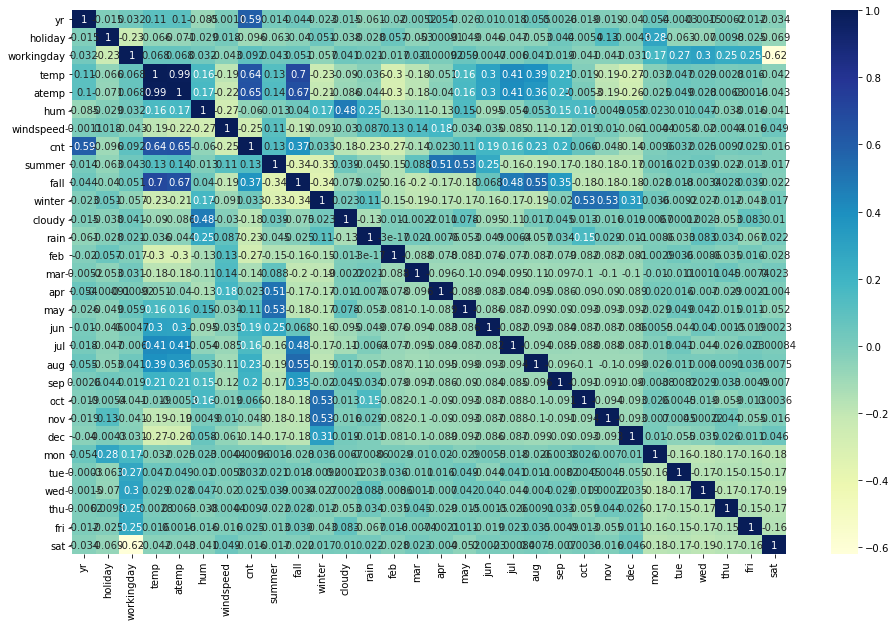

In [1300]:
# Check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [1301]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

In [1302]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [1304]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           1.10e-61
Time:                        12:13:42   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

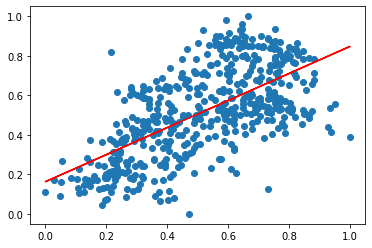

In [1303]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.163 + 0.684*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [1305]:
#Manual feature selection with all variables and running Logical regression
# Assign all the feature variables to X
X_train_lm = X_train[['yr','holiday','mon','tue','wed','thu','fri','sat','workingday','atemp', 
                      'feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec',
                      'temp','windspeed','hum','summer','fall','winter','cloudy','rain']]

X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()


In [1306]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          8.42e-181
Time:                        12:13:42   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1756      0.030      5.777      0.0

In [1307]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
26         thu     inf
27         fri     inf
23         mon     inf
1      holiday     inf
25         wed     inf
24         tue     inf
2   workingday     inf
3         temp  447.70
4        atemp  383.54
5          hum   20.79
8         fall   15.42
18         aug   11.01
9       winter   10.93
17         jul    9.62
7       summer    8.88
16         jun    7.35
19         sep    7.34
15         may    7.16
20         oct    6.64
21         nov    5.99
14         apr    5.64
6    windspeed    4.71
22         dec    3.78
13         mar    3.06
10      cloudy    2.21
0           yr    2.09
28         sat    1.93
12         feb    1.71
11        rain    1.23

Since there are many features whose p-value and VIF are very high, so we try automated feature selection

In [1418]:
#Automated feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#Rn RFE to get output variable of 15 features
lm=LinearRegression()
lm.fit(X_train, y_train)

rfe=RFE(lm, 15)
rfe=rfe.fit(X_train, y_train)


In [1419]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('cloudy', True, 1),
 ('rain', True, 1),
 ('feb', False, 7),
 ('mar', False, 2),
 ('apr', False, 4),
 ('may', False, 3),
 ('jun', False, 5),
 ('jul', False, 8),
 ('aug', True, 1),
 ('sep', True, 1),
 ('oct', True, 1),
 ('nov', False, 9),
 ('dec', False, 10),
 ('mon', False, 11),
 ('tue', False, 12),
 ('wed', False, 14),
 ('thu', False, 15),
 ('fri', False, 13),
 ('sat', True, 1)]

In [1420]:
#List of columns omitted using RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'nov', 'dec', 'mon',
       'tue', 'wed', 'thu', 'fri'],
      dtype='object')

In [1421]:
#List of columns selected using RFE
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'cloudy', 'rain', 'aug', 'sep', 'oct', 'sat'],
      dtype='object')

### Building stat model from automated feature selected columns for detailed statistics
Manual feature selection

In [1436]:
X_train_rfe = X_train[col]
## Add constant to new data set
X_train_rfe = sm.add_constant(X_train_rfe)

In [1437]:
#Run the linear regression model
lm=sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          1.89e-191
Time:                        12:42:37   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1950      0.029      6.791      0.0

In [1438]:
#Calculating VIF of each coefficient

vif=pd.DataFrame()
X=X_train_rfe
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

features    VIF
0        const  53.48
8         fall   6.04
4         temp   3.71
7       summer   2.60
9       winter   2.17
5          hum   1.91
3   workingday   1.88
15         sat   1.79
12         aug   1.68
10      cloudy   1.58
14         oct   1.52
13         sep   1.40
11        rain   1.26
6    windspeed   1.20
2      holiday   1.16
1           yr   1.04

In [1439]:
#Drop the 'fall' column since p-value is higher than 0.05.
X=X.drop('fall',1)

In [1440]:
#Run the linear regression model
lm=sm.OLS(y_train,X).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          3.24e-192
Time:                        12:42:43   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1945      0.029      6.770      0.0

In [1441]:
#Calculating VIF of each coefficient
vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

features    VIF
0        const  53.47
3   workingday   1.88
5          hum   1.88
14         sat   1.79
8       winter   1.72
4         temp   1.59
9       cloudy   1.57
13         oct   1.49
11         aug   1.46
7       summer   1.38
10        rain   1.25
12         sep   1.24
6    windspeed   1.19
2      holiday   1.16
1           yr   1.03

Here we see that all features have low p-values and VIF there is no case of multi-collinearity, next
we gor for prediction of variable of train model



## Step 6: Prediction of train model

In [1442]:
#Predict from lr model created in step 5
y_train_cnt = lm.predict(X)



## Step 7: Residual Analysis of the train data

Text(0.5, 0, 'Errors')

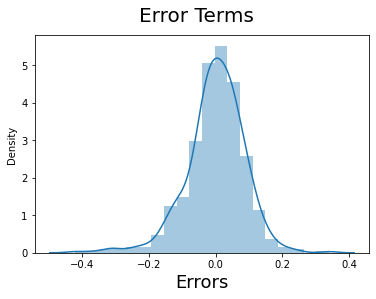

In [1443]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

In [1411]:
#Scale the continuious columns of test data.
num_vars = ['windspeed', 'temp', 'hum','atemp','cnt']       
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [1412]:
# Pop out the Y variable from test data
y_test = df_test.pop('cnt')

In [1444]:

X_test = df_test
#Add constant to test data 
X_test = sm.add_constant(X_test)

In [1445]:
#
X_test = X_test[X.columns]
X_test.describe()

const          yr     holiday  workingday        temp         hum  \
count  219.0  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     1.0    0.479452    0.036530    0.698630    0.546312    0.508750   
std      0.0    0.500722    0.188034    0.459904    0.249189    0.201253   
min      1.0    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.0    0.000000    0.000000    0.000000    0.328479    0.358469   
50%      1.0    0.000000    0.000000    1.000000    0.546045    0.494200   
75%      1.0    1.000000    0.000000    1.000000    0.759735    0.651165   
max      1.0    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed      summer      winter      cloudy        rain         aug  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.418870    0.264840    0.232877    0.319635    0.027397    0.059361   
std      0.188111    0.442259    0.423633    0.467403    0.163612    0.236840   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.283817    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.402533    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.524362    1.000000    0.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              sep         oct         sat  
count  219.000000  219.000000  219.000000  
mean     0.086758    0.082192    0.118721  
std      0.282125    0.275286    0.324202  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000

In [1446]:
# Making predictions using the model
X_test.info()
y_pred1 = lm.predict(X_test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       219 non-null    float64
 1   yr          219 non-null    int64  
 2   holiday     219 non-null    int64  
 3   workingday  219 non-null    int64  
 4   temp        219 non-null    float64
 5   hum         219 non-null    float64
 6   windspeed   219 non-null    float64
 7   summer      219 non-null    uint8  
 8   winter      219 non-null    uint8  
 9   cloudy      219 non-null    uint8  
 10  rain        219 non-null    uint8  
 11  aug         219 non-null    uint8  
 12  sep         219 non-null    uint8  
 13  oct         219 non-null    uint8  
 14  sat         219 non-null    uint8  
dtypes: float64(4), int64(3), uint8(8)
memory usage: 15.4 KB


In [1447]:
#Checking 'R-squared value' on test set
r2_score(y_true=y_test, y_pred=y_pred1)

0.8131074959531346

In [1448]:
#Checking 'R-squared value' on train set
r2_score(y_true=y_train, y_pred=y_train_cnt)

0.8481548087134351

In [1458]:
#Difference in percentage of 'R-squared value' of train vs test set.
r_diff=(r2_score(y_true=y_train, y_pred=y_train_cnt)-r2_score(y_true=y_test, y_pred=y_pred1))*100
print(round(r_diff,2),'%')

3.5 %


## Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

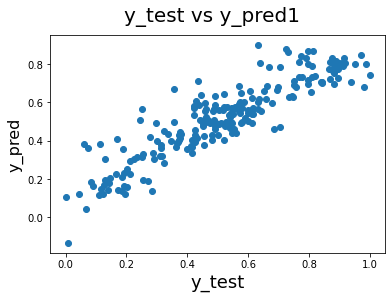

In [1449]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m9)
fig.suptitle('y_test vs y_pred1', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1945      0.029      6.770      0.000       0.138       0.251
yr             0.2292      0.008     28.743      0.000       0.213       0.245
holiday       -0.0558      0.027     -2.078      0.038      -0.109      -0.003
workingday     0.0444      0.012      3.850      0.000       0.022       0.067
temp           0.5301      0.022     24.136      0.000       0.487       0.573
hum           -0.1692      0.037     -4.580      0.000      -0.242      -0.097
windspeed     -0.1857      0.025     -7.359      0.000      -0.235      -0.136
summer         0.1039      0.011      9.680      0.000       0.083       0.125
winter         0.1348      0.012     11.316      0.000       0.111       0.158
cloudy        -0.0582      0.010     -5.618      0.000      -0.079      -0.038
rain          -0.2486      0.026     -9.559      0.000      -0.300      -0.197
aug            0.0560      0.016      3.478      0.001       0.024       0.088
sep            0.1255      0.016      7.783      0.000       0.094       0.157
oct            0.0411      0.017      2.403      0.017       0.007       0.075
sat            0.0529      0.015      3.647      0.000       0.024       0.081

### We can see that the equation of our best fitted line is:

Count = 0.2292Xyr - 0.0558Xholiday + 0.0444Xworkingday + 0.5301Xtemp - 0.1692Xhum - 0.1857Xwindspeed + 0.1039Xsummer +  0.1348Xwinter - 0.0582Xcloudy - 0.2819X𝑟ain + 0.0560Xaug + 0.1255Xsep +0.0411Xoct + 0.0529Xsat + 0.1945
